<a href="https://www.kaggle.com/code/alimohtadi/cifar10?scriptVersionId=133018532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from skimage.color import rgb2gray
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#loading data from keras dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

170508288/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

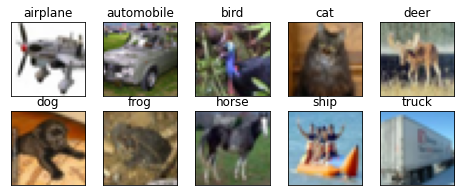

In [3]:
#create a list of class names for our dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


#plot one pic for every class in our dataset
fig = plt.figure(figsize=(8,3))
for i in np.unique(y_train):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train == i)[0][3]
    ax.set_title(class_names[i])
    plt.imshow(X_train[idx])
plt.show()

In [4]:
#creat gray image dataset for additional testing
X_train_gray = rgb2gray(X_train) 
X_test_gray = rgb2gray(X_test)
X_test_gray.shape, X_train_gray.shape

((10000, 32, 32), (50000, 32, 32))

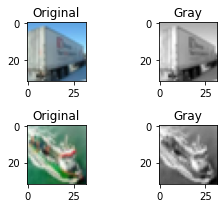

In [5]:
#compairing gray image with orginal one
fig, axes = plt.subplots(2,2,figsize=(4,3))
ax = axes.ravel()

ax[0].imshow(X_train[15])
ax[0].set_title('Original')
ax[1].imshow(X_train_gray[15],cmap='gray')
ax[1].set_title('Gray')
ax[2].imshow(X_test[15])
ax[2].set_title('Original')
ax[3].imshow(X_test_gray[15],cmap='gray')
ax[3].set_title('Gray')

fig.tight_layout()
plt.show()

In [6]:
#flating our dataset
X_train_gray_flt = X_train_gray.reshape(50000,32*32)
X_test_gray_flt = X_test_gray.reshape(10000,32*32)
X_train_flt = X_train.reshape(50000,32*32*3)
X_test_flt = X_test.reshape(10000,32*32*3)

In [18]:
#scaling our dataset
X_train_gray_flt = MinMaxScaler().fit_transform(X_train_gray_flt)
X_test_gray_flt = MinMaxScaler().fit_transform(X_test_gray_flt)
X_train_flt = MinMaxScaler().fit_transform(X_train_flt)
X_test_flt = MinMaxScaler().fit_transform(X_test_flt)
X_train = X_train/255
X_test = X_test/255

In [8]:
#train a simple model on gray image dataset
model1 = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model1.fit(X_train_gray_flt,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0136 - accuracy: 0.2677
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.8647 - accuracy: 0.3307
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7973 - accuracy: 0.3570
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7599 - accuracy: 0.3710
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7324 - accuracy: 0.3816


In [9]:
model1.evaluate(X_test_gray_flt,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.7456 - accuracy: 0.3830


[1.7456265687942505, 0.382999986410141]

In [10]:
#train a simple model on rgb dataset
model2 = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(3072,), activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X_train_flt,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8637 - accuracy: 0.3268
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6616 - accuracy: 0.4039
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5879 - accuracy: 0.4306
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5347 - accuracy: 0.4502
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4977 - accuracy: 0.4629


In [11]:
model2.evaluate(X_test_flt,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5453 - accuracy: 0.4520


[1.5452699661254883, 0.4519999921321869]

In [12]:
y_prd = model2.predict(X_test_flt)
y_prd = np.array([np.argmax(i) for i in y_prd])
print(f'Classification_report:\n {classification_report(y_test.reshape((10000,)),y_prd)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.48      1000
           1       0.68      0.41      0.51      1000
           2       0.32      0.44      0.37      1000
           3       0.31      0.34      0.32      1000
           4       0.44      0.29      0.35      1000
           5       0.41      0.30      0.34      1000
           6       0.39      0.70      0.50      1000
           7       0.54      0.48      0.51      1000
           8       0.60      0.57      0.58      1000
           9       0.55      0.54      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.45     10000
weighted avg       0.47      0.45      0.45     10000



In [14]:
#train on simple CNN model 
cnn_model = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


cnn_model.fit(X_train,y_train,epochs=8)

Epoch 1/8
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5410 - accuracy: 0.4451
Epoch 2/8
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2364 - accuracy: 0.5627
Epoch 3/8
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1090 - accuracy: 0.6116
Epoch 4/8
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0124 - accuracy: 0.6453
Epoch 5/8
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9474 - accuracy: 0.6697
Epoch 6/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8933 - accuracy: 0.6865
Epoch 7/8
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8438 - accuracy: 0.7045
Epoch 8/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8022 - accuracy: 0.7181


In [15]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9679 - accuracy: 0.6717


[0.9679306745529175, 0.6717000007629395]

In [16]:
y_prd = cnn_model.predict(X_test)
y_prd = np.array([np.argmax(i) for i in y_prd])
print(f'Classification_report:\n {classification_report(y_test.reshape((10000,)),y_prd)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.75      0.81      0.78      1000
           2       0.59      0.54      0.57      1000
           3       0.47      0.54      0.50      1000
           4       0.70      0.54      0.61      1000
           5       0.55      0.60      0.58      1000
           6       0.81      0.69      0.74      1000
           7       0.76      0.69      0.73      1000
           8       0.71      0.83      0.77      1000
           9       0.72      0.74      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



as we could see the CNN model perform very better than simple ANN model 